In [451]:
#pip install yfinance

In [452]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as web
from scipy.stats import skew, kurtosis
import seaborn as sns
from scipy.stats import norm  # You can choose a different distribution if needed
import matplotlib.pyplot as plt
from collections import deque
import datetime
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt

from scipy.stats import kstest


## Data

In [453]:
data = pd.read_excel('neokevin11.xlsx')
df_foschine =data['Foscine'].drop(data['Foscine'].index[-1]).values.tolist()
#df_foschine

In [454]:
def download_portfolio_adj_close(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def export_to_csv(data, filename):
    data.to_csv(filename)

tickers1 = ['ABG.JO', 'NED.JO', 'PIK.JO', 'SBK.JO']
tickers2 = ['AMZN','BAC','BK','C','GOOG']
start_date = '2013-08-01'
end_date = '2023-08-01'

SA_portfolio_prices = download_portfolio_adj_close(tickers1, start_date, end_date)

US_portfolio_prices = download_portfolio_adj_close(tickers2, start_date, end_date)

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  5 of 5 completed


## South African Potfolio data and Plots

In [455]:
SA_portfolio_prices['TFG.JO'] = df_foschine
SA_portfolio_prices.head()

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO
Date,,,,,
2013-08-01,7123.024902,10094.554688,2839.341064,6499.646484,6112.089355
2013-08-02,7191.174805,10104.125000,2853.976807,6500.795410,6124.679199
2013-08-05,7101.315918,10216.140625,2807.142578,6558.325195,6045.550293
2013-08-06,7087.686035,10075.977539,2723.718750,6507.123535,5875.902832
2013-08-07,7029.632812,10183.494141,2671.029297,6529.562012,5842.933594


In [456]:
## USA portfolio data and plots

In [457]:
US_portfolio_prices

,AMZN,BAC,BK,C,GOOG
Date,,,,,
2013-08-01,15.278500,12.438543,25.026880,42.470882,22.521086
2013-08-02,15.210500,12.347024,24.870468,42.583382,22.579617
2013-08-05,15.049500,12.313741,24.776613,42.478920,22.540512
2013-08-06,15.037500,12.180621,24.651474,41.362122,22.330549
2013-08-07,14.845500,12.089099,24.377745,41.378189,22.183102
...,...,...,...,...,...
2023-07-25,129.130005,31.884298,43.942081,46.549908,122.790001
2023-07-26,128.149994,32.142147,44.746380,46.945320,129.660004
2023-07-27,128.250000,31.685951,44.686981,47.330849,129.869995


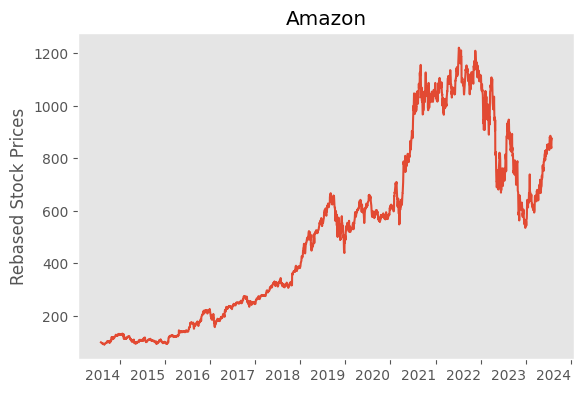

In [458]:
((US_portfolio_prices['AMZN']/15.278500)*100).plot()
plt.ylabel('Rebased Stock Prices')
plt.xticks(rotation=0)
plt.title('Amazon')
plt.xlabel('')
plt.grid(False)
plt.show()

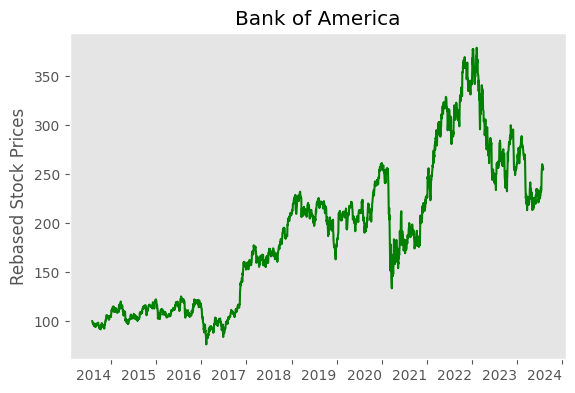

In [459]:
((US_portfolio_prices['BAC']/12.438544)*100).plot(color='green')
plt.ylabel('Rebased Stock Prices')
plt.title('Bank of America')
plt.xticks(rotation=0)
plt.xlabel('')
plt.grid(False)
plt.show()

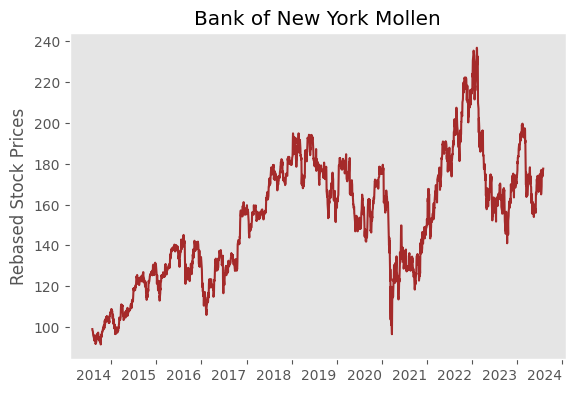

In [460]:
((US_portfolio_prices['BK']/25.280594)*100).plot(color='brown')
plt.ylabel('Rebased Stock Prices')
plt.title('Bank of New York Mollen')
plt.xticks(rotation=0)
plt.xlabel('')
plt.grid(False)
plt.show()

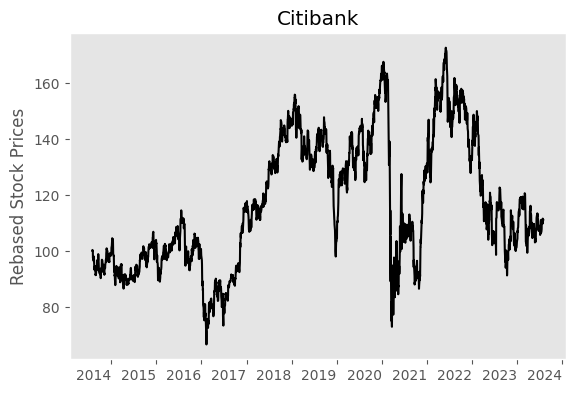

In [461]:
((US_portfolio_prices['C']/42.470898)*100).plot(color='black')
plt.ylabel('Rebased Stock Prices')
plt.title('Citibank')
plt.xticks(rotation=0)
plt.xlabel('')
plt.grid(False)
plt.show()

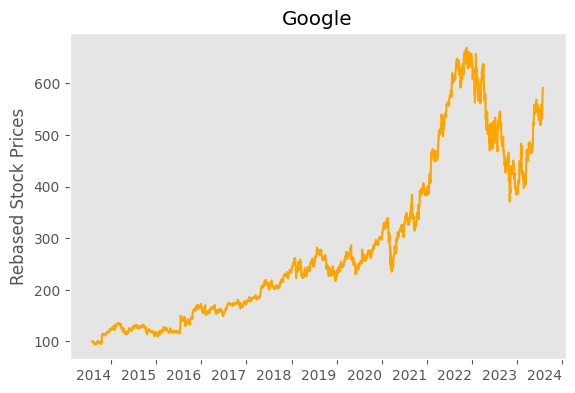

In [462]:
((US_portfolio_prices['GOOG']/22.521086)*100).plot(color='orange')
plt.ylabel('Rebased Stock Prices')
plt.title('Google')
plt.xticks(rotation=0)
plt.xlabel('')
plt.grid(False)
plt.show()

## $\underline{\text{Section A:}}$$\text{ Portfolio and Share priece simple return}$


$\underline{Question 1}:$  $\text{  Share price Simple returns}$

In [463]:
def portfolio_share_return(df):
    return df.pct_change()

In [464]:
SA_share_return = portfolio_share_return(SA_portfolio_prices)
SA_share_return.head()

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO
Date,,,,,
2013-08-01,NaN,NaN,NaN,NaN,NaN
2013-08-02,0.009568,0.000948,0.005155,0.000177,0.002060
2013-08-05,-0.012496,0.011086,-0.016410,0.008850,-0.012920
2013-08-06,-0.001919,-0.013720,-0.029718,-0.007807,-0.028062
2013-08-07,-0.008191,0.010671,-0.019345,0.003448,-0.005611


In [465]:
US_share_return = portfolio_share_return(US_portfolio_prices)
US_share_return.head()

,AMZN,BAC,BK,C,GOOG
Date,,,,,
2013-08-01,NaN,NaN,NaN,NaN,NaN
2013-08-02,-0.004451,-0.007358,-0.006250,0.002649,0.002599
2013-08-05,-0.010585,-0.002696,-0.003774,-0.002453,-0.001732
2013-08-06,-0.000797,-0.010811,-0.005051,-0.026291,-0.009315
2013-08-07,-0.012768,-0.007514,-0.011104,0.000388,-0.006603


 # New Section Portfolio returns
$\underline{\text{Question 2}}:$  $\text{  Portfolio returns}$

In [466]:

def df_portfolio_return(df):
    df_return = df.pct_change()
    df_return = df_return.drop('2013-08-01')


    returns_weight = [.2,.2,.2,.2,.2]
    df_return['Portfolio return'] = df_return.multiply(returns_weight, axis=1).sum(axis=1)
    return df_return


In [467]:
US_portfolio_return = df_portfolio_return(US_portfolio_prices)
US_portfolio_return

,AMZN,BAC,BK,C,GOOG,Portfolio return
Date,,,,,,
2013-08-02,-0.004451,-0.007358,-0.006250,0.002649,0.002599,-0.002562
2013-08-05,-0.010585,-0.002696,-0.003774,-0.002453,-0.001732,-0.004248
2013-08-06,-0.000797,-0.010811,-0.005051,-0.026291,-0.009315,-0.010453
2013-08-07,-0.012768,-0.007514,-0.011104,0.000388,-0.006603,-0.007520
2013-08-08,-0.003941,0.005506,-0.003529,0.005437,0.002257,0.001146
...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982


## US Correlation Matrix

In [468]:
corr = US_portfolio_return[['AMZN', 'BAC', 'BK', 'C', 'GOOG']].corr(method = 'pearson')
corr

,AMZN,BAC,BK,C,GOOG
AMZN,1.000000,0.319823,0.298454,0.318847,0.640765
BAC,0.319823,1.000000,0.790974,0.874094,0.430538
BK,0.298454,0.790974,1.000000,0.767708,0.407560
C,0.318847,0.874094,0.767708,1.000000,0.441986
GOOG,0.640765,0.430538,0.407560,0.441986,1.000000


### Testing for Normailty using JB Test

In [469]:
print('Portfolio: ', stats.jarque_bera(US_portfolio_return['Portfolio return']))
print('..')
print('AMZN:      ', stats.jarque_bera( US_portfolio_return['AMZN']))
print('..')
print('BAC:       ', stats.jarque_bera(US_portfolio_return['BAC']))
print('..')
print('BK:        ', stats.jarque_bera(US_portfolio_return['BK']))
print('..')
print('C:         ', stats.jarque_bera(US_portfolio_return['C']))
print('..')
print('GOOG:      ', stats.jarque_bera(US_portfolio_return['GOOG']))
print('..')

Portfolio:  SignificanceResult(statistic=8867.394732422626, pvalue=0.0)
..
AMZN:       SignificanceResult(statistic=4519.803786190635, pvalue=0.0)
..
BAC:        SignificanceResult(statistic=11027.06704434798, pvalue=0.0)
..
BK:         SignificanceResult(statistic=11213.583771448995, pvalue=0.0)
..
C:          SignificanceResult(statistic=18857.06696744135, pvalue=0.0)
..
GOOG:       SignificanceResult(statistic=6711.438179006091, pvalue=0.0)
..


Testing for Normailty using KS Test

In [470]:
print('Portfolio: ', kstest(( US_portfolio_return['Portfolio return']), 'norm'))
print('..')
print('AMZN:      ', kstest(( US_portfolio_return['AMZN']), 'norm'))
print('..')
print('BAC:       ', kstest((US_portfolio_return['BAC']), 'norm'))
print('..')
print('BK:        ', kstest((US_portfolio_return['BK']), 'norm'))
print('..')
print('C:         ', kstest((US_portfolio_return['C']), 'norm'))
print('..')
print('GOOG:      ', kstest((US_portfolio_return['GOOG']), 'norm'))
print('..')

Portfolio:  KstestResult(statistic=0.4773923108638472, pvalue=0.0, statistic_location=-0.04372627616292217, statistic_sign=-1)
..
AMZN:       KstestResult(statistic=0.46832392606224554, pvalue=0.0, statistic_location=-0.05950180896147472, statistic_sign=-1)
..
BAC:        KstestResult(statistic=0.4706139959733271, pvalue=0.0, statistic_location=-0.06373620210029962, statistic_sign=-1)
..
BK:         KstestResult(statistic=0.4760433319708506, pvalue=0.0, statistic_location=0.0471111558751105, statistic_sign=1)
..
C:          KstestResult(statistic=0.4700426974063706, pvalue=0.0, statistic_location=-0.06117656196183907, statistic_sign=-1)
..
GOOG:       KstestResult(statistic=0.4742406739309844, pvalue=0.0, statistic_location=-0.054629502634568006, statistic_sign=-1)
..




$\underline{\text{Question 3}}:$  $\text{  Portfolio return plots}$

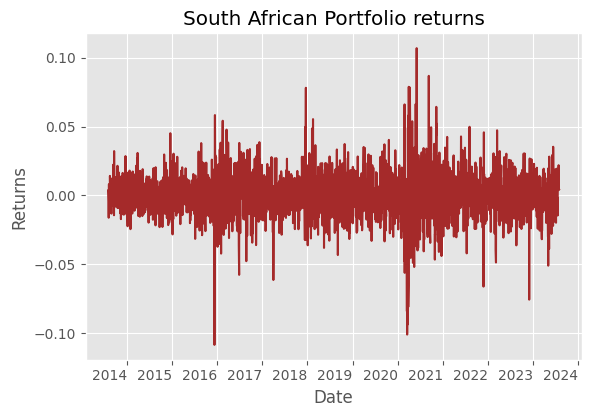

In [471]:
SA_portfolio_return['Portfolio return'].plot(color='brown')
plt.ylabel('Returns')
plt.title('South African Portfolio returns')
plt.xticks(rotation=0)
plt.show()

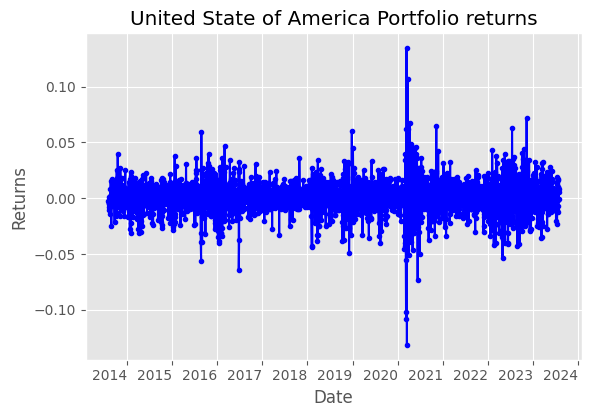

In [472]:
US_portfolio_return
US_portfolio_return['Portfolio return'].plot(color='blue',marker='.')
plt.ylabel('Returns')
plt.title('United State of America Portfolio returns')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Returns (%)')

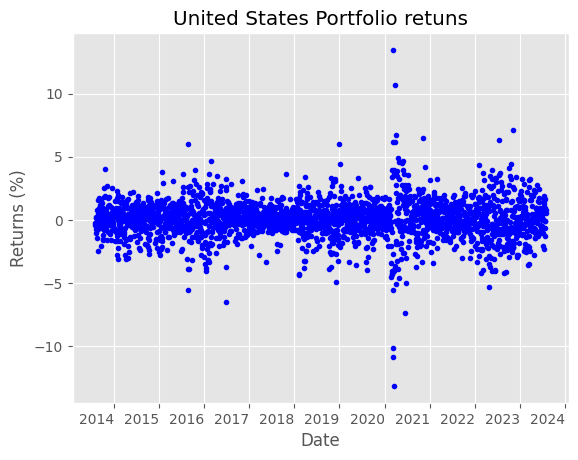

In [473]:
date = US_portfolio_return.index

# To draw scatter time series plot of the given dataframe
plt.plot_date(date,US_portfolio_return["Portfolio return"]*100,ms=3, color = 'blue') #, label='Returns')


# rotating the x-axis tick labels at 30degree towards right
plt.xticks(rotation=30, ha='right')

# Giving title to the chart using plt.title
plt.title('United States Portfolio retuns')
#plt.legend(loc='best')
# Providing x and y label to the chart
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Returns (%)')

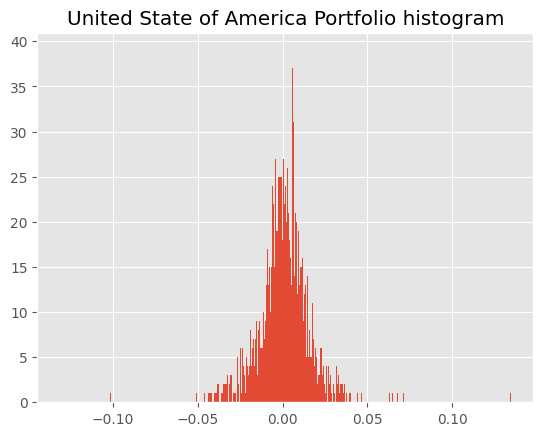

In [474]:
plt.style.use('ggplot')
plt.hist(US_portfolio_return['Portfolio return'], bins=1000)
plt.title('United State of America Portfolio histogram')
plt.show()

[]

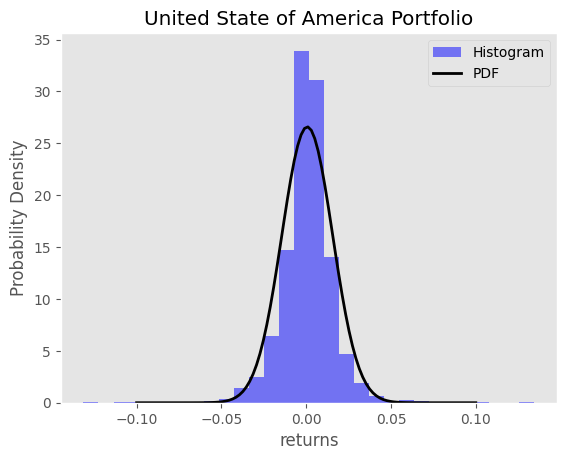

In [475]:
# Create a histogram
plt.hist(US_portfolio_return['Portfolio return'], bins=30, density=True, alpha=0.5, color='b', label='Histogram')

# Fit a probability density function (PDF)
mu, std = norm.fit(US_portfolio_return['Portfolio return'])
xmin, xmax = plt.xlim()
x = np.linspace(-0.10, 0.10, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels and a legend
plt.xlabel('returns')
plt.grid(False)
#plt.xlabel('')
plt.ylabel('Probability Density')
plt.title("United State of America Portfolio")
plt.legend()# Calculate the theoretical quantiles for the sorted data
plt.plot()


<ipython-input-476-4ba55b721baa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(US_portfolio_return['Portfolio return'], hist=True, kde=True,


<Axes: xlabel='Portfolio return', ylabel='Density'>

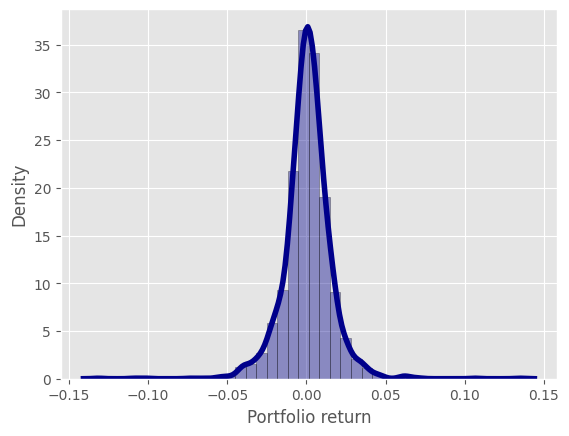

In [476]:
sns.distplot(US_portfolio_return['Portfolio return'], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



$\underline{\text{Question 4}}:$  $\text{  Summary statistics}$

In [477]:
def summary_stats_of_share(df):
    #df_return = df.pct_change()
    #df_return = df_return.drop('2013-08-01')


    print(df.describe())
    print()
    print('Skewness: ',skew(df, axis=0, bias=True))
    print('Kurtosis: ',kurtosis(df, axis=0, bias=True))


In [478]:
US_stats = summary_stats_of_share(US_portfolio_return)

              AMZN          BAC           BK            C         GOOG  \
count  2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean      0.001078     0.000560     0.000378     0.000249     0.000860   
std       0.020796     0.019402     0.017056     0.020341     0.017575   
min      -0.140494    -0.153974    -0.145034    -0.192986    -0.111008   
25%      -0.008606    -0.008932    -0.007463    -0.008846    -0.006902   
50%       0.001074     0.000452     0.000680     0.000206     0.000752   
75%       0.011304     0.010235     0.009004     0.009074     0.009182   
max       0.141311     0.177962     0.156165     0.179843     0.160524   

       Portfolio return  
count       2515.000000  
mean           0.000625  
std            0.015007  
min           -0.131340  
25%           -0.006322  
50%            0.000818  
75%            0.008038  
max            0.134527  

Skewness:  [ 0.26947598  0.2660757  -0.21478461  0.00067277  0.50084556 -0.16358617]
Kurtosis:  [ 

In [479]:
US_portfolio_return

,AMZN,BAC,BK,C,GOOG,Portfolio return
Date,,,,,,
2013-08-02,-0.004451,-0.007358,-0.006250,0.002649,0.002599,-0.002562
2013-08-05,-0.010585,-0.002696,-0.003774,-0.002453,-0.001732,-0.004248
2013-08-06,-0.000797,-0.010811,-0.005051,-0.026291,-0.009315,-0.010453
2013-08-07,-0.012768,-0.007514,-0.011104,0.000388,-0.006603,-0.007520
2013-08-08,-0.003941,0.005506,-0.003529,0.005437,0.002257,0.001146
...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982


## $\underline{\text{Section B:}}$$\text{ Historical Simulation approach}$

$\underline{Question 1}:$  $\text{1day Historical Simulation    }VaR_{\alpha}(X),$ $\alpha=99\%$

In [480]:
def HS_VaR(portfolio_returns,  confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [481]:
confidence_level = .99
investment = 100
HS_1day_VaR_US = HS_VaR(US_portfolio_return['Portfolio return'], confidence_level, investment)
# adding the zero list with VaR list
HS_1day_VaR_US = [0.0]*252+HS_1day_VaR_US

# This code add a list of VaRT into a portflio data
US_portfolio_return['1 day HS VaR'] = HS_1day_VaR_US
US_HS_1dayVaR = US_portfolio_return['1 day HS VaR'][252:]
US_HS_1dayVaR

Date
2014-08-04    2.904128
2014-08-05    2.904128
2014-08-06    2.904128
2014-08-07    2.904128
2014-08-08    2.904128
                ...   
2023-07-25    3.522364
2023-07-26    3.522364
2023-07-27    3.522364
2023-07-28    3.522364
2023-07-31    3.522364
Name: 1 day HS VaR, Length: 2263, dtype: float64

In [482]:
confidence_level = .99
investment = 100

HS_1day_VaR_SA = HS_VaR(SA_portfolio_return['Portfolio return'], confidence_level, investment)


# adding the zero list with VaR list
HS_1day_VaR_SA = [0.0]*252+HS_1day_VaR_SA

# This code add a list of VaRT into a portflio data
SA_portfolio_return['1 day HS VaR'] = HS_1day_VaR_SA
SA_HS_1dayVaR = SA_portfolio_return['1 day HS VaR'][252:]
SA_HS_1dayVaR

Date
2014-07-22    2.112682
2014-07-23    2.112682
2014-07-24    2.112682
2014-07-25    2.112682
2014-07-28    2.112682
                ...   
2023-07-25    3.760601
2023-07-26    3.760601
2023-07-27    3.760601
2023-07-28    3.760601
2023-07-31    3.760601
Name: 1 day HS VaR, Length: 2290, dtype: float64

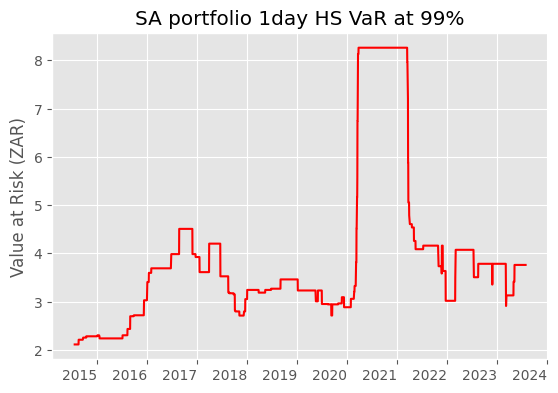

In [483]:
(SA_HS_1dayVaR).plot(color='red')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 1day HS VaR at 99%')
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

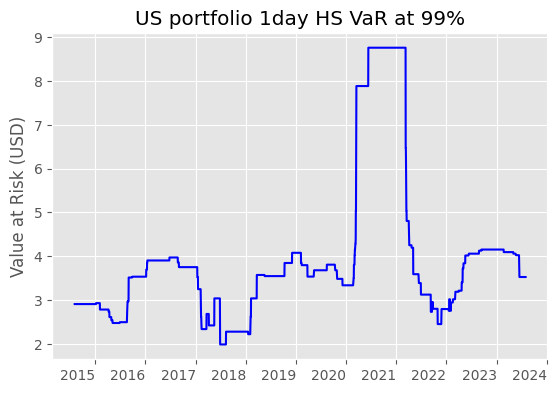

In [484]:
(US_HS_1dayVaR).plot(color='blue')
plt.ylabel('Value at Risk (USD)')
plt.title('US portfolio 1day HS VaR at 99%')
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

### **Backtesting 1day HS**

In [485]:
US_portfolio_return['Exception'] = np.where((-US_portfolio_return['1 day HS VaR'].shift(1)< US_portfolio_return['Portfolio return']*100),0,1)
#US_portfolio_return
window = 253

# Calculate the rolling sum for the next 10 years
rolling_sum = US_portfolio_return['Exception'][252:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
US_portfolio_return['Violations per year'] = rolling_sum

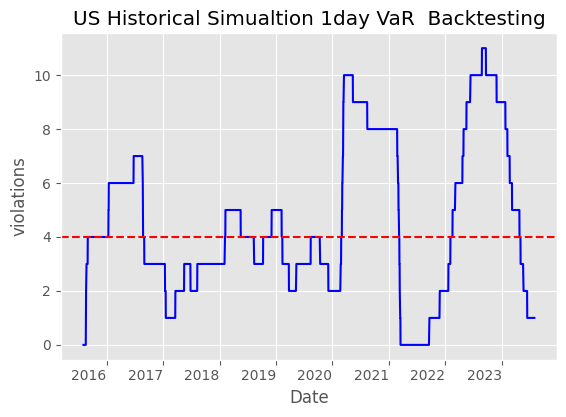

In [486]:
HS_Back = US_portfolio_return['Violations per year'][504:]

HS_Back.plot(color = 'blue')
# Add a horizontal line at y=3
plt.axhline(y=4, color='red', linestyle='--', label='Expected Exception')
plt.title('US Historical Simualtion 1day VaR  Backtesting')
plt.ylabel('violations')
plt.xticks(rotation=0)
plt.show()

## $\underline{\text{Historical Simulation (HS) Regulatory Market Risk Capital (USD) of US portfolio}}$

* **$\textbf{MRC}_t= \text{max}\left(VaR_{t-1},\sum_{t=1}^{60}VaR_{t-60}\right)$**

In [487]:
import pandas as pd

# Assuming SA_portfolio_return is your DataFrame, and 'Violations per year' is a column in it
# You can replace 'SA_portfolio_return' and 'Violations per year' with your actual DataFrame and column names

# Define a function to calculate 'k' based on the given logic
def calculate_k(violations):
    if violations <= 4:
        return 3
    elif violations == 5:
        return 3.4
    elif violations == 6:
        return 3.5
    elif violations == 7:
        return 3.65
    elif violations == 8:
        return 3.75
    elif violations == 9:
        return 3.85
    else:
        return 4

# Add the 'k' column to your DataFrame using the apply() function
US_portfolio_return['k'] = US_portfolio_return['Violations per year'].apply(calculate_k)
#US_portfolio_return
window_size = 60

# Calculate the rolling average for the '1day VcV VaR' column
US_portfolio_return['Rolling_60_Average_VaR'] = US_portfolio_return['1 day HS VaR'].rolling(window=window_size).mean()

# Now, your DataFrame has a new 'Rolling_Average' column with the rolling average
US_portfolio_return['HS_MRC'] = np.maximum(US_portfolio_return['Rolling_60_Average_VaR'] * US_portfolio_return['k'],SA_portfolio_return['1 day HS VaR'])


In [488]:
HS_MRC = US_portfolio_return[504:]
HS_MRC

,AMZN,BAC,BK,C,GOOG,Portfolio return,1 day HS VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,HS_MRC
Date,,,,,,,,,,,,
2015-08-04,-0.005850,0.001688,0.011291,0.000513,-0.003105,0.000907,2.491026,0,0.0,3.0,2.480294,7.440882
2015-08-05,0.009607,0.003932,0.011620,0.004618,0.023091,0.010574,2.491026,0,0.0,3.0,2.480610,7.441829
2015-08-06,-0.014059,-0.003358,-0.002703,-0.010895,-0.001709,-0.006545,2.491026,0,0.0,3.0,2.480925,7.442776
2015-08-07,-0.012919,-0.003369,0.010614,-0.003270,-0.011483,-0.004085,2.491026,0,0.0,3.0,2.481241,7.443723
2015-08-10,0.002641,0.016338,0.011397,0.014333,-0.002471,0.008447,2.491026,0,0.0,3.0,2.481557,7.444670
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.522364,0,1.0,3.0,3.804033,11.412098
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.522364,0,1.0,3.0,3.794558,11.383673
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.522364,0,1.0,3.0,3.785083,11.355248


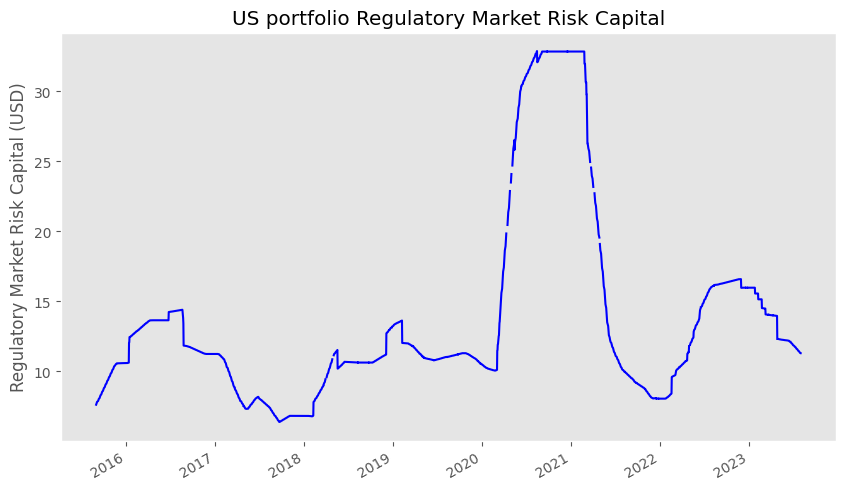

In [489]:
(US_portfolio_return['HS_MRC'][523:]).plot(color='blue',figsize=(10,6))
plt.ylabel('Regulatory Market Risk Capital (USD)')
plt.title('US portfolio Regulatory Market Risk Capital')
plt.xlabel('')
plt.grid(False)
plt.show()

In [490]:
def HS_VaR(portfolio_returns,  confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [491]:
#historical_1day_VaR(US_portfolio_return, confidence_level, investment)

$\underline{Question 2}:$  $\text{10day   simple return under HS approach}$

In [492]:
def df_10day_portfolio_return(df):
    df_return_10day = df.pct_change(periods=9)
    # Define the dates of the rows you want to remove
    dates_to_remove = [datetime.date(2013, 8, 1), datetime.date(2013, 8, 2), datetime.date(2013, 8, 5),
                       datetime.date(2013, 8, 6), datetime.date(2013, 8, 7),  datetime.date(2013, 8, 8),
                       datetime.date(2013, 8, 9), datetime.date(2013, 8, 12),
                       datetime.date(2013, 8, 13)]
    # Remove rows with the specified dates
    df_return_10day = df_return_10day[~df_return_10day.index.isin(dates_to_remove)]


    returns_weight = [.2,.2,.2,.2,.2]
    df_return_10day['Portfolo return'] = df_return_10day.multiply(returns_weight, axis=1).sum(axis=1)
    return df_return_10day



SA_portfolio_return_10day = df_10day_portfolio_return(SA_portfolio_prices)
US_portfolio_return_10day = df_10day_portfolio_return(US_portfolio_prices)
US_portfolio_return_10day

,AMZN,BAC,BK,C,GOOG,Portfolo return
Date,,,,,,
2013-08-14,-0.046569,-0.023411,-0.040938,-0.024025,-0.038055,-0.034600
2013-08-15,-0.058315,-0.035040,-0.043396,-0.040377,-0.051745,-0.045775
2013-08-16,-0.053723,-0.025676,-0.035038,-0.047664,-0.053138,-0.043048
2013-08-19,-0.050474,-0.033470,-0.044099,-0.041764,-0.034487,-0.040859
2013-08-20,-0.033074,-0.016517,-0.019570,-0.030680,-0.028328,-0.025634
...,...,...,...,...,...,...
2023-07-25,-0.012768,0.095027,-0.009288,-0.006121,0.026501,0.018670
2023-07-26,-0.045793,0.092349,0.001317,-0.003985,0.038693,0.016516
2023-07-27,-0.047743,0.097561,0.071231,0.046557,0.033174,0.040156


In [493]:
SA_portfolio_return_10day

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolo return
Date,,,,,,
2013-08-14,-0.004252,0.062901,-0.038660,0.025402,-0.038054,0.001467
2013-08-15,-0.019586,0.055710,-0.051282,0.008407,-0.047079,-0.010766
2013-08-16,-0.004976,0.050526,-0.026330,0.010790,0.005652,0.007132
2013-08-19,-0.012820,0.059218,0.014240,0.007869,0.020200,0.017741
2013-08-20,-0.006104,0.051351,0.050959,0.005110,0.043911,0.029045
...,...,...,...,...,...,...
2023-07-25,0.055803,0.023033,-0.057805,0.045081,0.011501,0.015523
2023-07-26,0.053155,0.030230,-0.084583,0.024996,0.055913,0.015942
2023-07-27,0.058301,0.057774,-0.056784,0.046576,0.115936,0.044361


$\underline{Question 3}:$  $\text{10day Historical Simulation   }VaR_{\alpha}(X),$ $\alpha=99\%$

In [494]:
confidence_level = .99
investment = 100
#SA_portfolio_return_HS_10day = HS_VaR(SA_portfolio_return_10day['Portfolio return'], confidence_level, investment)
US_portfolio_10_day_VaR = HS_VaR(US_portfolio_return_10day['Portfolo return'], confidence_level, investment)
US_portfolio_10_day_VaR = [0.0]*252+US_portfolio_10_day_VaR
US_portfolio_return_10day['10 day HS VaR'] = US_portfolio_10_day_VaR
US_portfolio_return_10day[252:]

,AMZN,BAC,BK,C,GOOG,Portfolo return,10 day HS VaR
Date,,,,,,,
2014-08-14,0.085163,0.022697,-0.011360,0.021414,0.015157,0.026614,6.512917
2014-08-15,0.063702,0.011295,-0.024490,0.007861,0.000576,0.011789,6.512917
2014-08-18,0.071113,0.030000,-0.009756,0.033827,0.030244,0.031086,6.512917
2014-08-19,0.067667,0.016448,-0.018815,0.032406,0.036170,0.026775,6.512917
2014-08-20,0.078118,0.026455,0.009370,0.036205,0.037507,0.037531,6.512917
...,...,...,...,...,...,...,...
2023-07-25,-0.012768,0.095027,-0.009288,-0.006121,0.026501,0.018670,9.802084
2023-07-26,-0.045793,0.092349,0.001317,-0.003985,0.038693,0.016516,9.802084
2023-07-27,-0.047743,0.097561,0.071231,0.046557,0.033174,0.040156,9.802084


In [495]:
confidence_level = .99
investment = 100
#SA_portfolio_return_HS_10day = HS_VaR(SA_portfolio_return_10day['Portfolio return'], confidence_level, investment)
SA_portfolio_10_day_VaR = HS_VaR(SA_portfolio_return_10day['Portfolo return'], confidence_level, investment)
SA_portfolio_10_day_VaR = [0.0]*252+SA_portfolio_10_day_VaR
SA_portfolio_return_10day['10 day HS VaR'] = SA_portfolio_10_day_VaR
SA_portfolio_return_10day[252:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolo return,10 day HS VaR
Date,,,,,,,
2014-08-01,0.008547,-0.020898,0.028049,-0.003311,0.043459,0.011169,6.466400
2014-08-04,0.014406,0.003755,0.029483,0.010243,0.070483,0.025674,6.466400
2014-08-05,0.012266,0.000000,0.010848,-0.002320,0.084454,0.021050,6.466400
2014-08-06,-0.007461,-0.024175,0.010152,-0.026545,0.071711,0.004736,6.466400
2014-08-07,-0.006627,-0.012278,0.004744,-0.026819,0.048829,0.001570,6.466400
...,...,...,...,...,...,...,...
2023-07-25,0.055803,0.023033,-0.057805,0.045081,0.011501,0.015523,11.337355
2023-07-26,0.053155,0.030230,-0.084583,0.024996,0.055913,0.015942,11.337355
2023-07-27,0.058301,0.057774,-0.056784,0.046576,0.115936,0.044361,11.337355


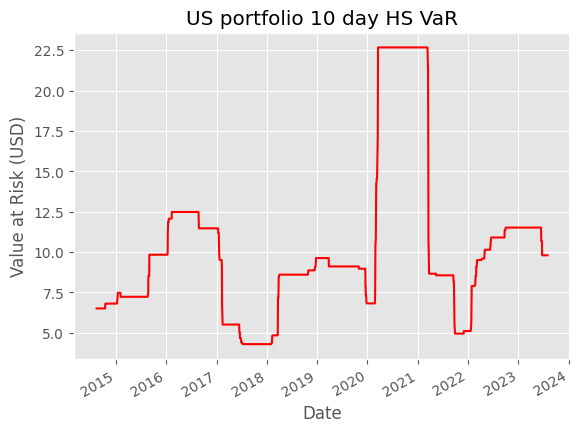

In [497]:
(US_portfolio_return_10day['10 day HS VaR'][252:]).plot(color='red')
plt.ylabel('Value at Risk (USD)')
plt.title('US portfolio 10 day HS VaR')
plt.show()

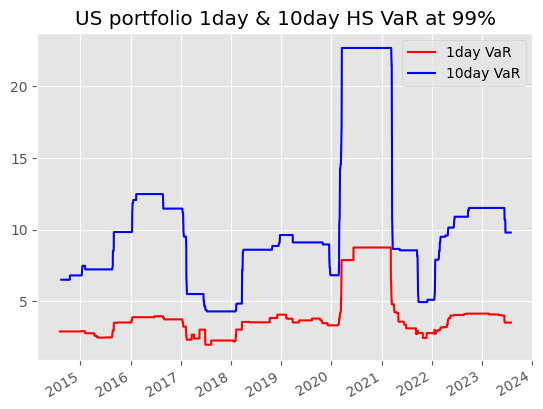

In [498]:
(US_HS_1dayVaR).plot(color='red',label = '1day VaR')
(US_portfolio_return_10day['10 day HS VaR'][252:]).plot(color='blue',label = '10day VaR')

plt.xlabel('')
plt.title('US portfolio 1day & 10day HS VaR at 99%')
plt.legend(loc='best')
plt.show()

# (US_portfolio_return_10day['10 day HS VaR'][252:]).plot(color='red')
# plt.ylabel('Value at Risk (USD)')
# plt.title('US portfolio 10 day HS VaR')
# plt.show()

# $\underline{\text{Section C:}}$$\text{ Varience covarience approach}$

$\underline{\text{Question 1}}:$  $\text{Varience covarience  1day and 10day }VaR_{\alpha}(X),$ $\alpha=99\%$

In [499]:
def vcv_1day_VaR(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [500]:
US_portfolio_return = df_portfolio_return(US_portfolio_prices)
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

In [501]:
confidence_level = .99
investment = 100

#SA_portfolio_return_vcv_1day = vcv_1day_VaR(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
US_portfolio_return_vcv_1day = vcv_1day_VaR(US_portfolio_return['Portfolio return'], confidence_level ,investment)
US_portfolio_return_vcv_1day = [0.0]*252+US_portfolio_return_vcv_1day
US_portfolio_return['1day VcV VaR'] = US_portfolio_return_vcv_1day
US_VcV_1day_VaR = US_portfolio_return['1day VcV VaR']
US_VcV_1day_VaR.tail()

Date
2023-07-25    3.759057
2023-07-26    3.753789
2023-07-27    3.753791
2023-07-28    3.734160
2023-07-31    3.696790
Name: 1day VcV VaR, dtype: float64

In [502]:
SA_portfolio_return_vcv_1day = vcv_1day_VaR(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return_vcv_1day = [0.0]*252+SA_portfolio_return_vcv_1day
SA_portfolio_return['1day VcV VaR'] = SA_portfolio_return_vcv_1day
SA_VcV_1day_VaR = SA_portfolio_return['1day VcV VaR']
SA_VcV_1day_VaR.tail()

Date
2023-07-25    3.269256
2023-07-26    3.258396
2023-07-27    3.273257
2023-07-28    3.273291
2023-07-31    3.264006
Name: 1day VcV VaR, dtype: float64

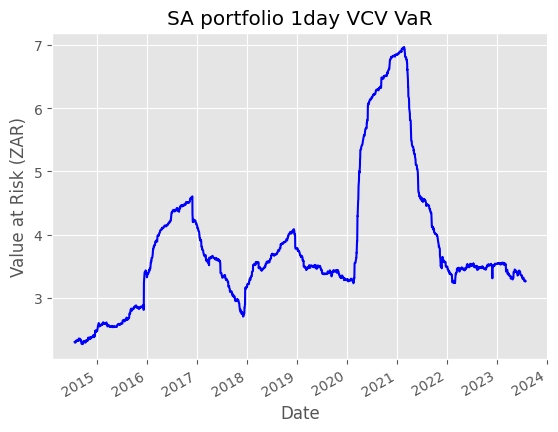

In [503]:
(SA_VcV_1day_VaR[252:]).plot(color='blue')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 1day VCV VaR')
plt.show()

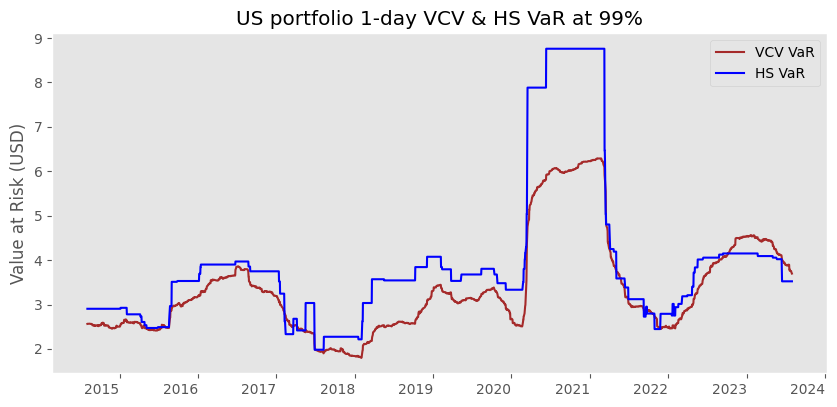

In [504]:
(US_VcV_1day_VaR[252:]).plot(color='brown', label ='VCV VaR',figsize=(10,5))
(US_HS_1dayVaR).plot(color='blue', label ='HS VaR')
plt.ylabel('Value at Risk (USD)')
plt.title('US portfolio 1-day VCV & HS VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Returns (%)')

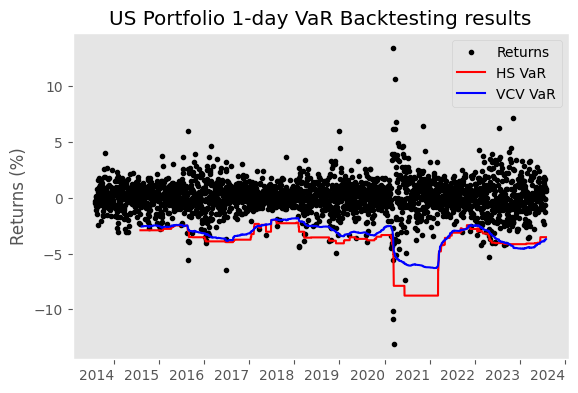

In [506]:
date = US_portfolio_return.index

# To draw scatter time series plot of the given dataframe
plt.plot_date(date,US_portfolio_return["Portfolio return"]*100,ms=3, color = 'black', label='Returns')
(-US_HS_1dayVaR).plot(color='red', label = 'HS VaR')
(-US_VcV_1day_VaR[261:]).plot(color='blue', label = 'VCV VaR')


# rotating the x-axis tick labels at 30degree towards right
plt.xticks(rotation=30, ha='right')

# Giving title to the chart using plt.title
plt.title('US Portfolio 1-day VaR Backtesting results')
plt.legend(loc='best')
# Providing x and y label to the chart

plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Returns (%)')

## Backtesting of 1 day vcv df

In [507]:
SA_portfolio_return['Exception'] =  np.where((-SA_portfolio_return['1day VcV VaR'].shift(1)<
                                             SA_portfolio_return['Portfolio return']*100),0,1)
window = 253
rolling_sum = SA_portfolio_return['Exception'][252:].rolling(window=window).sum()
SA_portfolio_return['Violation per year'] = rolling_sum

print(SA_portfolio_return['Violation per year'][504:])



Date
2015-07-09    3.0
2015-07-10    3.0
2015-07-13    3.0
2015-07-14    3.0
2015-07-15    3.0
             ... 
2023-07-25    4.0
2023-07-26    4.0
2023-07-27    4.0
2023-07-28    4.0
2023-07-31    4.0
Name: Violation per year, Length: 2038, dtype: float64


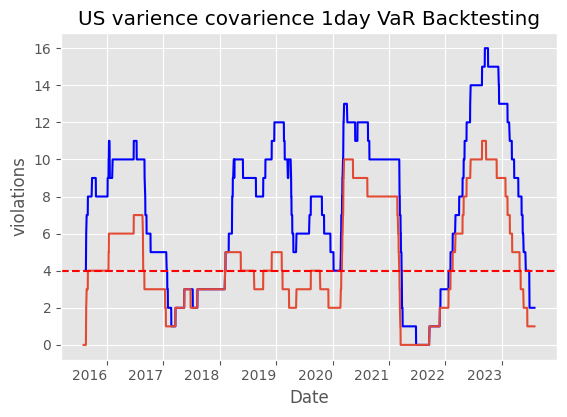

In [508]:
US_portfolio_return['Exception'] = np.where((-US_portfolio_return['1day VcV VaR'].shift(1)< US_portfolio_return['Portfolio return']*100),0,1)
#US_portfolio_return
window = 262

# Calculate the rolling sumshock for the next 10 years
rolling_sum = US_portfolio_return['Exception'][252:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
US_portfolio_return['Violations per year'] = rolling_sum

US_portfolio_return['Violations per year'][262:].plot(color = 'blue')
HS_Back.plot()
# Add a horizontal line at y=3
plt.axhline(y=4, color='red', linestyle='--', label='Expected Exception')
plt.title('US varience covarience 1day VaR Backtesting')
plt.ylabel('violations')
plt.xticks(rotation=0)
plt.show()

In [509]:
US_portfolio_return['Exception'] = np.where((-US_portfolio_return['1day VcV VaR'].shift(1)<
                                            US_portfolio_return['Portfolio return']*100),0,1)
window = 253
# Calculate the rolling sum for the next 10 years
rolling_sum = US_portfolio_return['Exception'][252:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
US_portfolio_return['Violations per year'] = rolling_sum
print(US_portfolio_return['Violations per year'][252:])

Date
2014-08-04    NaN
2014-08-05    NaN
2014-08-06    NaN
2014-08-07    NaN
2014-08-08    NaN
             ... 
2023-07-25    2.0
2023-07-26    2.0
2023-07-27    2.0
2023-07-28    2.0
2023-07-31    2.0
Name: Violations per year, Length: 2263, dtype: float64


In [559]:
# US_portfolio_return['Violations per year'][252:].plot(color='black', label='Exceptions VCV VaR',figsize = (10,5))
# HS_Back.plot(color = 'blue', label = 'Exceptions HS VaR')
# # Add a horizontal line at y=3
# plt.axhline(y=4, color='green', linestyle='--', label='Expected Exception')
# plt.axhline(y=4, color='yellow', linestyle='--', label='Expected Exception')

# # Set the plot title and ylabel
# plt.title('US portfolio 1-day HS VaR and VCV VaR Backtesting violation')
# plt.ylabel('violations')

# # Add a legend
# plt.legend()
# plt.grid(False)
# plt.xlabel('')
# plt.xticks(rotation=0)
# # Show the plot
# plt.show()

In [512]:
HS_Back

Date
2015-08-04    0.0
2015-08-05    0.0
2015-08-06    0.0
2015-08-07    0.0
2015-08-10    0.0
             ... 
2023-07-25    1.0
2023-07-26    1.0
2023-07-27    1.0
2023-07-28    1.0
2023-07-31    1.0
Name: Violations per year, Length: 2011, dtype: float64

In [513]:
US_portfolio_return['Violations per year'][504:]

Date
2015-08-04    4.0
2015-08-05    4.0
2015-08-06    4.0
2015-08-07    4.0
2015-08-10    4.0
             ... 
2023-07-25    2.0
2023-07-26    2.0
2023-07-27    2.0
2023-07-28    2.0
2023-07-31    2.0
Name: Violations per year, Length: 2011, dtype: float64

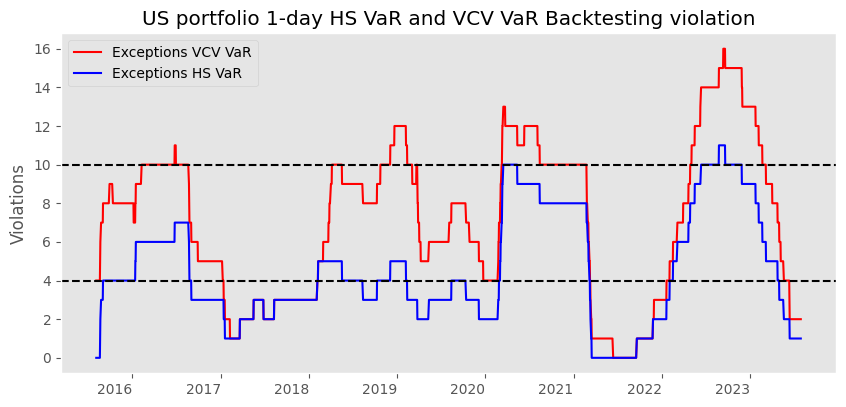

In [514]:
US_portfolio_return['Violations per year'][504:].plot(color='red', label='Exceptions VCV VaR',figsize = (10,5))
HS_Back.plot(color = 'blue', label = 'Exceptions HS VaR')
# Add a horizontal line at y=3
plt.axhline(y=4, color='black', linestyle='--')
plt.axhline(y=10, color='black', linestyle='--')

# Set the plot title and ylabel
plt.title('US portfolio 1-day HS VaR and VCV VaR Backtesting violation')
plt.ylabel('Violations')

# Add a legend
plt.legend()
plt.grid(False)
plt.xlabel('')
# Show the plot
plt.xticks(rotation=0)
plt.show()

## $\underline{\text{Varience Covarienc (VCV) Regulatory Market Risk Capital (ZA) for US portfolio}}$

* **$\textbf{MRC}_t= \text{max}\left(VaR_{t-1},\sum_{t=1}^{60}VaR_{t-60}\right)$**

In [515]:
US_portfolio_return['Exception'] = np.where((-US_portfolio_return['1day VcV VaR'].shift(1)<
                                            US_portfolio_return['Portfolio return']*100),0,1)
window = 253
# Calculate the rolling sum for the next 10 years
rolling_sum = US_portfolio_return['Exception'][252:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
US_portfolio_return['Violations per year'] = rolling_sum
US_portfolio_return[504:]

,AMZN,BAC,BK,C,GOOG,Portfolio return,1day VcV VaR,Exception,Violations per year
Date,,,,,,,,,
2015-08-04,-0.005850,0.001688,0.011291,0.000513,-0.003105,0.000907,2.479513,0,4.0
2015-08-05,0.009607,0.003932,0.011620,0.004618,0.023091,0.010574,2.479020,0,4.0
2015-08-06,-0.014059,-0.003358,-0.002703,-0.010895,-0.001709,-0.006545,2.478375,0,4.0
2015-08-07,-0.012919,-0.003369,0.010614,-0.003270,-0.011483,-0.004085,2.477891,0,4.0
2015-08-10,0.002641,0.016338,0.011397,0.014333,-0.002471,0.008447,2.476222,0,4.0
...,...,...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.759057,0,2.0
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.753789,0,2.0
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.753791,0,2.0


In [516]:
import pandas as pd

# Assuming SA_portfolio_return is your DataFrame, and 'Violations per year' is a column in it
# You can replace 'SA_portfolio_return' and 'Violations per year' with your actual DataFrame and column names

# Define a function to calculate 'k' based on the given logic
def calculate_k(violations):
    if violations <= 4:
        return 3
    elif violations == 5:
        return 3.4
    elif violations == 6:
        return 3.5
    elif violations == 7:
        return 3.65
    elif violations == 8:
        return 3.75
    elif violations == 9:
        return 3.85
    else:
        return 4

# Add the 'k' column to your DataFrame using the apply() function
US_portfolio_return['k'] = US_portfolio_return['Violations per year'].apply(calculate_k)

# Now, your DataFrame has a new 'k' column based on the specified logic
US_portfolio_return[504:]

,AMZN,BAC,BK,C,GOOG,Portfolio return,1day VcV VaR,Exception,Violations per year,k
Date,,,,,,,,,,
2015-08-04,-0.005850,0.001688,0.011291,0.000513,-0.003105,0.000907,2.479513,0,4.0,3.0
2015-08-05,0.009607,0.003932,0.011620,0.004618,0.023091,0.010574,2.479020,0,4.0,3.0
2015-08-06,-0.014059,-0.003358,-0.002703,-0.010895,-0.001709,-0.006545,2.478375,0,4.0,3.0
2015-08-07,-0.012919,-0.003369,0.010614,-0.003270,-0.011483,-0.004085,2.477891,0,4.0,3.0
2015-08-10,0.002641,0.016338,0.011397,0.014333,-0.002471,0.008447,2.476222,0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.759057,0,2.0,3.0
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.753789,0,2.0,3.0
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.753791,0,2.0,3.0


In [517]:

# Assuming SA_portfolio_return is your DataFrame, and '1day VcV VaR' is the column of interest
# Replace 'SA_portfolio_return' and '1day VcV VaR' with your actual DataFrame and column names

# Specify the window size for the rolling average (60 values)
window_size = 60

# Calculate the rolling average for the '1day VcV VaR' column
US_portfolio_return['Rolling_60_Average_VaR'] = US_portfolio_return['1day VcV VaR'].rolling(window=window_size).mean()


# Now, your DataFrame has a new 'Rolling_Average' column with the rolling average
US_portfolio_return['VCV_MRC'] = np.maximum(US_portfolio_return['Rolling_60_Average_VaR'] * US_portfolio_return['k'],US_portfolio_return['1day VcV VaR'])
US_portfolio_return[504:]

,AMZN,BAC,BK,C,GOOG,Portfolio return,1day VcV VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,VCV_MRC
Date,,,,,,,,,,,,
2015-08-04,-0.005850,0.001688,0.011291,0.000513,-0.003105,0.000907,2.479513,0,4.0,3.0,2.452979,7.358938
2015-08-05,0.009607,0.003932,0.011620,0.004618,0.023091,0.010574,2.479020,0,4.0,3.0,2.453379,7.360138
2015-08-06,-0.014059,-0.003358,-0.002703,-0.010895,-0.001709,-0.006545,2.478375,0,4.0,3.0,2.453742,7.361226
2015-08-07,-0.012919,-0.003369,0.010614,-0.003270,-0.011483,-0.004085,2.477891,0,4.0,3.0,2.454402,7.363206
2015-08-10,0.002641,0.016338,0.011397,0.014333,-0.002471,0.008447,2.476222,0,4.0,3.0,2.454995,7.364985
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.759057,0,2.0,3.0,4.062581,12.187742
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.753789,0,2.0,3.0,4.051770,12.155309
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.753791,0,2.0,3.0,4.041013,12.123038


In [518]:
HS_MRC

,AMZN,BAC,BK,C,GOOG,Portfolio return,1 day HS VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,HS_MRC
Date,,,,,,,,,,,,
2015-08-04,-0.005850,0.001688,0.011291,0.000513,-0.003105,0.000907,2.491026,0,0.0,3.0,2.480294,7.440882
2015-08-05,0.009607,0.003932,0.011620,0.004618,0.023091,0.010574,2.491026,0,0.0,3.0,2.480610,7.441829
2015-08-06,-0.014059,-0.003358,-0.002703,-0.010895,-0.001709,-0.006545,2.491026,0,0.0,3.0,2.480925,7.442776
2015-08-07,-0.012919,-0.003369,0.010614,-0.003270,-0.011483,-0.004085,2.491026,0,0.0,3.0,2.481241,7.443723
2015-08-10,0.002641,0.016338,0.011397,0.014333,-0.002471,0.008447,2.491026,0,0.0,3.0,2.481557,7.444670
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.522364,0,1.0,3.0,3.804033,11.412098
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.522364,0,1.0,3.0,3.794558,11.383673
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.522364,0,1.0,3.0,3.785083,11.355248


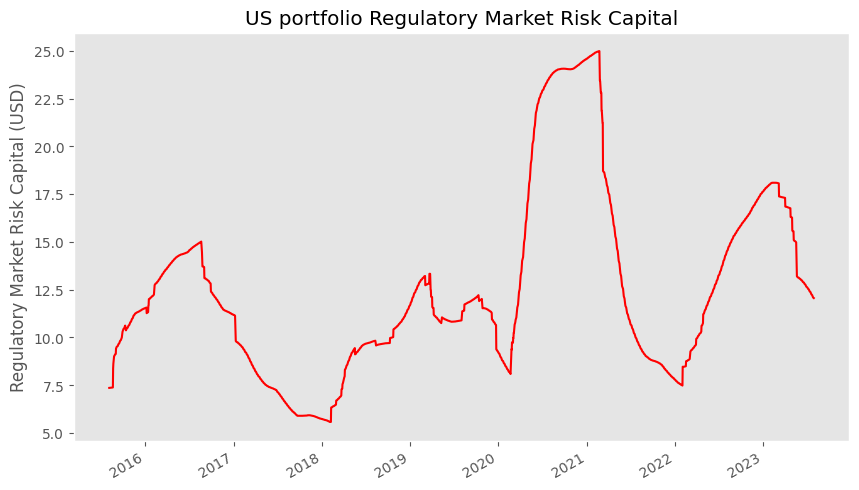

In [519]:
(US_portfolio_return['VCV_MRC'][504:]).plot(color='red',figsize=(10,6))
plt.ylabel('Regulatory Market Risk Capital (USD)')
plt.title('US portfolio Regulatory Market Risk Capital')
plt.xlabel('')
plt.grid(False)
plt.show()

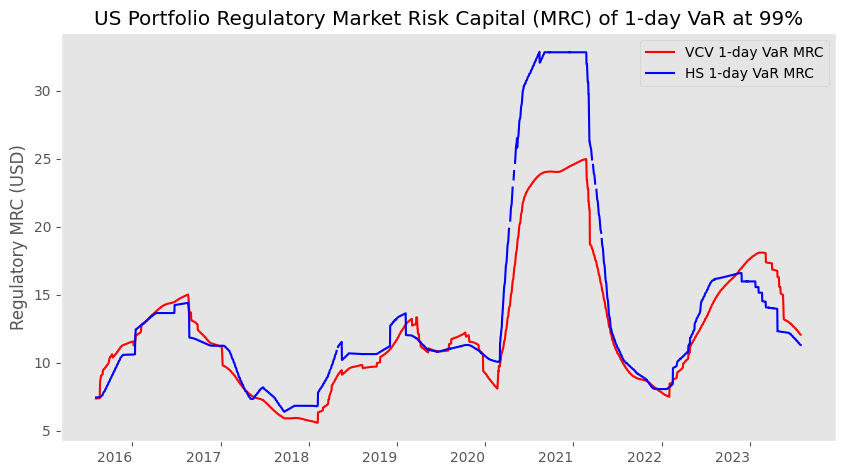

In [520]:
(US_portfolio_return['VCV_MRC'][504:]).plot(color='red', label ='VCV 1-day VaR MRC',figsize=(10,6))
HS_MRC['HS_MRC'].plot(color='blue', label ='HS 1-day VaR MRC')
plt.ylabel('Regulatory MRC (USD)')
plt.title('US Portfolio Regulatory Market Risk Capital (MRC) of 1-day VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

$\underline{\text{Question 2}}:$  $\text{Varience covarience  10day  }VaR_{\alpha}(X),$ $\alpha=99\%$

In [521]:
def vcv_10day_VaR(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment*np.sqrt(10)  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment*np.sqrt(10)  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles



In [522]:
US_portfolio_return = df_portfolio_return(US_portfolio_prices)
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

In [523]:
confidence_level = .99
investment = 100


US_portfolio_return_vcv_10day = vcv_10day_VaR(US_portfolio_return['Portfolio return'], confidence_level ,investment)
US_portfolio_return_vcv_10day = [0.0]*252+US_portfolio_return_vcv_10day
US_portfolio_return['10day VcV VaR'] = US_portfolio_return_vcv_10day
US_VcV_10day_VaR = US_portfolio_return['10day VcV VaR']
US_VcV_10day_VaR.tail()

Date
2023-07-25    11.887182
2023-07-26    11.870523
2023-07-27    11.870529
2023-07-28    11.808451
2023-07-31    11.690276
Name: 10day VcV VaR, dtype: float64

In [524]:
confidence_level = .99
investment = 100


SA_portfolio_return_vcv_10day = vcv_10day_VaR(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return_vcv_10day = [0.0]*252+SA_portfolio_return_vcv_10day
SA_portfolio_return['10day VcV VaR'] = SA_portfolio_return_vcv_10day
SA_VcV_10day_VaR = SA_portfolio_return['10day VcV VaR']
SA_VcV_10day_VaR.tail()

Date
2023-07-25    10.338294
2023-07-26    10.303953
2023-07-27    10.350948
2023-07-28    10.351056
2023-07-31    10.321695
Name: 10day VcV VaR, dtype: float64

## Comperison of 1day and 10day  VaR at $\alpha=99\%$

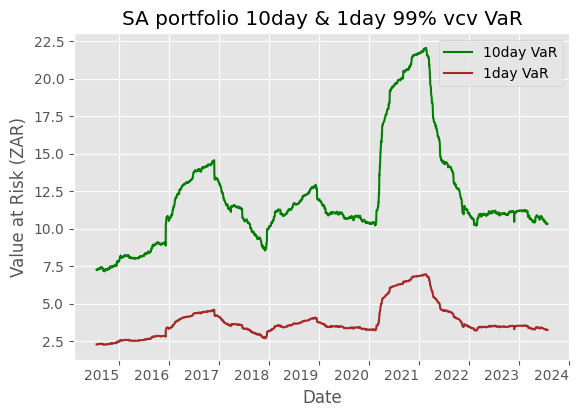

In [525]:
(SA_VcV_10day_VaR[252:]).plot(color='green', label = '10day VaR')
(SA_VcV_1day_VaR[252:]).plot(color='brown', label = '1day VaR')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 10day & 1day 99% vcv VaR')
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.show()

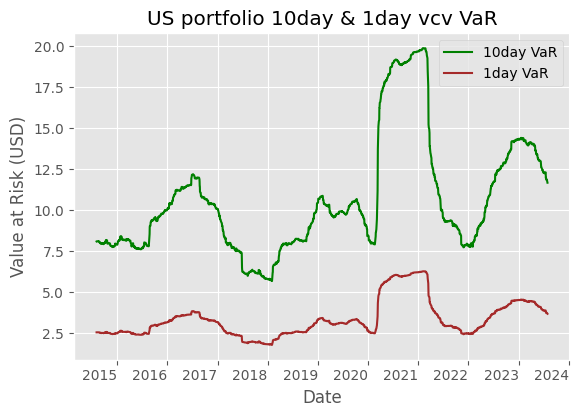

In [526]:
(US_VcV_10day_VaR[252:]).plot(color='green', label = '10day VaR')
(US_VcV_1day_VaR[252:]).plot(color='brown', label = '1day VaR')
plt.ylabel('Value at Risk (USD)')
plt.title('US portfolio 10day & 1day vcv VaR')
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.show()

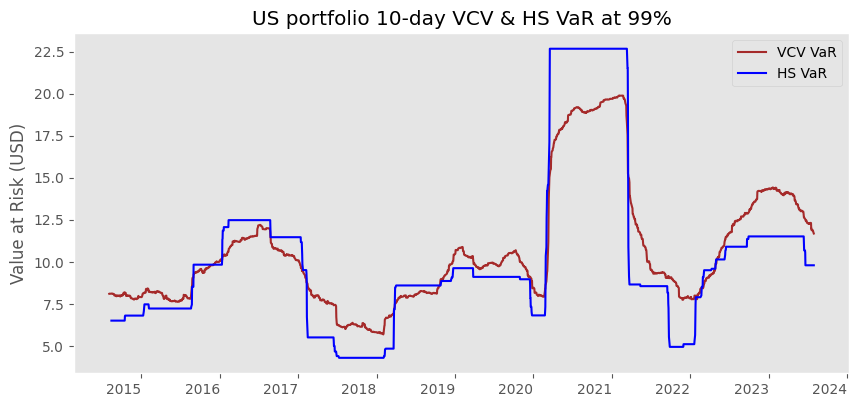

In [527]:
(US_VcV_10day_VaR[252:]).plot(color='brown', label = 'VCV VaR',figsize=(10,5))
#(US_VcV_1day_VaR[252:]).plot(color='brown', label = '1day VaR')
(US_portfolio_return_10day['10 day HS VaR'][252:]).plot(color='blue',label = 'HS VaR')
plt.ylabel('Value at Risk (USD)')
plt.title('US portfolio 10-day VCV & HS VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

## $\underline{\text{Section C:}}$$\text{ Expected Shortfall for botth HS and VCV methods}$

$\underline{Question 1}:$  $\text{1day Varience Covarience    }ES(X),$ $\alpha=97.5\%$

In [528]:
np.exp(2)

7.38905609893065

In [529]:
def vcv_ES(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = (1/(1-confidence_level))*(np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment  # 90th percentile
    #ES = (np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment
    percentiles.append(percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = (1/(1-confidence_level))*(np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

**United State of America VCV ES plots**

In [530]:
US_portfolio_return = df_portfolio_return(US_portfolio_prices)
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

In [531]:
confidence_level = .975
investment = 100
US_portfolio_return_ES = vcv_ES(US_portfolio_return['Portfolio return'], confidence_level ,investment)
US_portfolio_return_ES = [0.0]*252+US_portfolio_return_ES
US_portfolio_return['10day VcV VaR'] = US_portfolio_return_ES
US_VcV_ES = US_portfolio_return['10day VcV VaR']
US_VcV_ES[252:]

Date
2014-08-04    2.571693
2014-08-05    2.573935
2014-08-06    2.574893
2014-08-07    2.573364
2014-08-08    2.573323
                ...   
2023-07-25    3.770094
2023-07-26    3.764810
2023-07-27    3.764812
2023-07-28    3.745124
2023-07-31    3.707644
Name: 10day VcV VaR, Length: 2263, dtype: float64

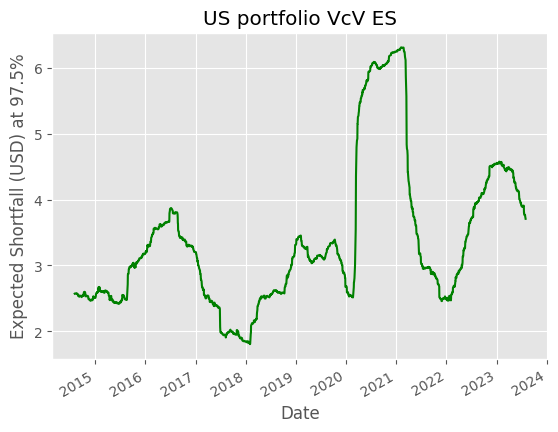

In [532]:
(US_VcV_ES[252:]).plot(color='green')
plt.ylabel('Expected Shortfall (USD) at 97.5%')
plt.title('US portfolio VcV ES')
plt.show()

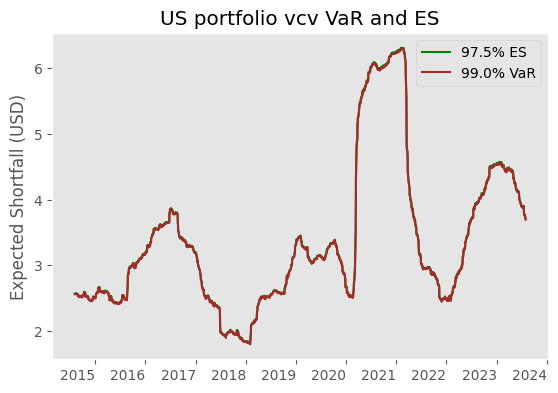

In [533]:
# Assuming you have already defined the dataframes US_VcV_ES and US_VcV_1day_VaR

# Plot the data with labels
US_VcV_ES_plot = US_VcV_ES[252:].plot(color='green', label='97.5% ES')
US_VcV_1day_VaR_plot = US_VcV_1day_VaR[252:].plot(color='brown', label='99.0% VaR')

# Set labels and title
plt.ylabel('Expected Shortfall (USD)')
plt.title('US portfolio vcv VaR and ES')

plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
# Add legends
plt.legend(loc='best')  # 'best' loc places the legend in the best location
plt.show()

**South African VCV ES plots**

In [534]:
confidence_level = .975
investment = 100
SA_portfolio_return_ES = vcv_ES(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return_ES = [0.0]*252+SA_portfolio_return_ES
SA_portfolio_return['10day VcV VaR'] = SA_portfolio_return_ES
SA_VcV_ES = SA_portfolio_return['10day VcV VaR']
SA_VcV_ES[252:]

Date
2014-07-22    2.308334
2014-07-23    2.309740
2014-07-24    2.309321
2014-07-25    2.295211
2014-07-28    2.299628
                ...   
2023-07-25    3.278854
2023-07-26    3.267963
2023-07-27    3.282867
2023-07-28    3.282902
2023-07-31    3.273590
Name: 10day VcV VaR, Length: 2290, dtype: float64

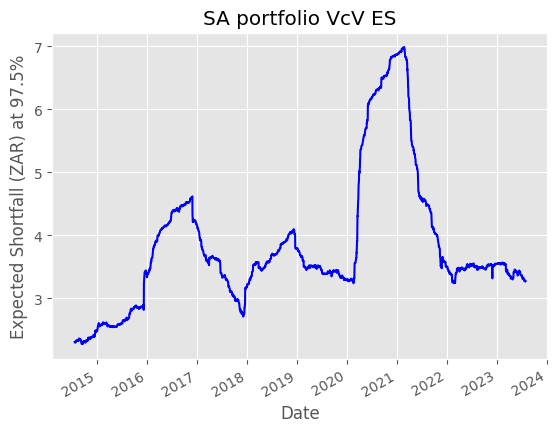

In [535]:
(SA_VcV_ES[252:]).plot(color='blue')
plt.ylabel('Expected Shortfall (ZAR) at 97.5%')
plt.title('SA portfolio VcV ES')
plt.show()

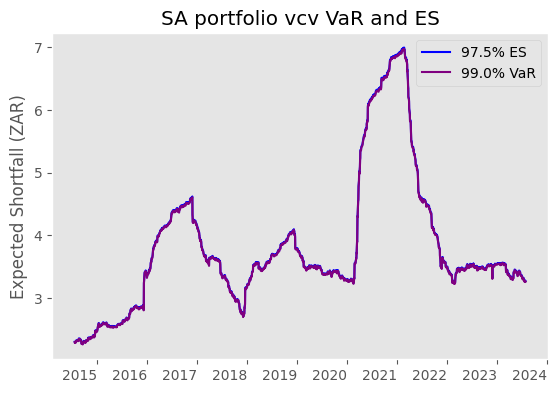

In [536]:
# Assuming you have already defined the dataframes US_VcV_ES and US_VcV_1day_VaR

# Plot the data with labels
SA_VcV_ES_plot = SA_VcV_ES[252:].plot(color='blue', label='97.5% ES')
SA_VcV_1day_VaR_plot = SA_VcV_1day_VaR[252:].plot(color='purple', label='99.0% VaR')
# Set labels and title
plt.ylabel('Expected Shortfall (ZAR)')
plt.title('SA portfolio vcv VaR and ES')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(False)
# Add legends
plt.legend(loc='best')  # 'best' loc places the legend in the best location
plt.show()

$\underline{\text{Question 2}}:$ $\text{Historical simulation ES(X) at }\alpha =97.5\% $

In [537]:
def HS_ES(portfolio_returns, confidence_level, investment):
    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 253
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the returns that are below the percentile
    below_percentile_returns = []

    # Calculate percentiles for the initial window
    percentile_value = np.percentile(window, confidence_level)  # e.g., 99th percentile

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_value = np.percentile(window, confidence_level)  # e.g., 99th percentile

        # Check if the new_data_point is below the percentile
        if new_data_point < percentile_value:
            below_percentile_returns.append(new_data_point)

    # Calculate the average of returns that are below the percentile
    average_return_below_percentile = np.mean(below_percentile_returns)

    return average_return_below_percentile




US_portfolio_return = df_portfolio_return(US_portfolio_prices)


US_portfolio_return["PortfoliSection

Date
2013-08-02   -0.256208
2013-08-05   -0.424782
2013-08-06   -1.045286
2013-08-07   -0.752007
2013-08-08    0.114606
                ...   
2014-07-29   -0.645418
2014-07-30    1.072303
2014-07-31   -2.376473
2014-08-01   -1.416553
2014-08-04    1.115346
Name: Portfolio return, Length: 253, dtype: float64

In [538]:
def expected_shortfall(returns, confidence_level):
    # Calculate the VaR (Value at Risk) at the specified confidence level
    var = np.percentile(returns, 100 - confidence_level)

    # Find all returns worse than VaR
    worse_returns = [ret for ret in returns if ret <= var]

    # Calculate the Expected Shortfall (average of worse returns)
    es = -np.mean(worse_returns)

    return es

In [539]:
US_portfolio_return["Portfolio return"][:253]*100

Date
2013-08-02   -0.256208
2013-08-05   -0.424782
2013-08-06   -1.045286
2013-08-07   -0.752007
2013-08-08    0.114606
                ...   
2014-07-29   -0.645418
2014-07-30    1.072303
2014-07-31   -2.376473
2014-08-01   -1.416553
2014-08-04    1.115346
Name: Portfolio return, Length: 253, dtype: float64

In [540]:
expected_shortfall(US_portfolio_return["Portfolio return"][:253]*100, 97.5)

2.8165392837738468

In [541]:
def HS_daily_expected_shortfall(daily_returns, confidence_level):
    """
    Calculate the daily Expected Shortfall (ES) for a given confidence level using a rolling window of 253 days.

    Parameters:
    - daily_returns (list or numpy array): Daily returns data for a specific asset or portfolio.
    - confidence_level (float): The desired confidence level for VaR and ES calculations, e.g., 95 for 95%.

    Returns:
    - daily_es_values (list): List of daily Expected Shortfall values for each day in the input data.
    """

    def expected_shortfall(daily_returns, confidence_level):
        # Calculate the VaR (Value at Risk) at the specified confidence level
        var = np.percentile(daily_returns, 100 - confidence_level)

        # Find all returns worse than VaR
        worse_returns = [ret for ret in daily_returns if ret <= var]

        # Calculate the Expected Shortfall (average of worse returns)
        es = -np.mean(worse_returns)

        return es
#Value at Risk and Expected ShortfallValue at Risk and Expected Shortfall
    # Initialize parameters
    window_size = 252
    total_days = len(daily_returns)

    # Initialize an empty list to store the ES values
    daily_es_values = []

    for i in range(total_days):
        if i >= window_size:
            # Extract the rolling window of returns
            window_returns = daily_returns[i - window_size:i]

            # Calculate the ES for the window
            es = expected_shortfall(window_returns, confidence_level)

            # Append the ES value to the list
            daily_es_values.append(es)

    return daily_es_values


**United State of America VCV ES**

In [542]:
US = US_portfolio_return["Portfolio return"]*100
confidence_level = 97.5
US_portfolio_HS_ES = HS_daily_expected_shortfall(US, confidence_level)
#Question

US_portfolio_return['HS Expected Shortfall'] = [0.0]*252 + US_portfolio_HS_ES

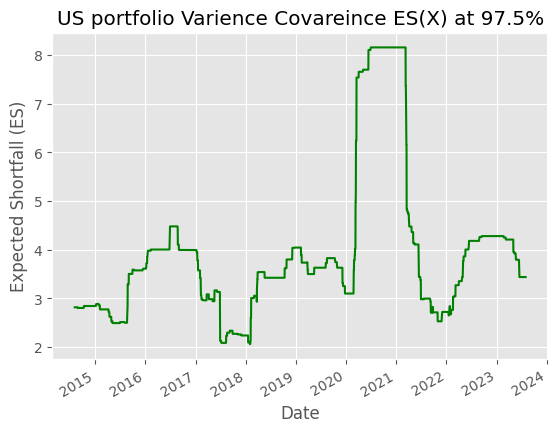

In [543]:
#US_portfolio_return['HS Expected Shortfall'] = [0.0]*252+US_portfolio_HS_ES
(US_portfolio_return['HS Expected Shortfall'][252:]).plot(color='green')
plt.ylabel('Expected Shortfall (ES)')
plt.title('US portfolio Varience Covareince ES(X) at 97.5%')
plt.show()

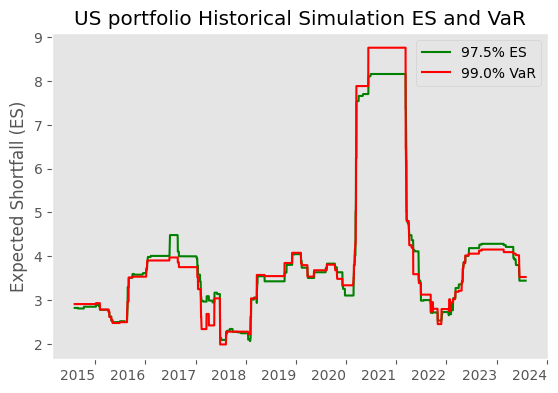

In [544]:
(US_portfolio_return['HS Expected Shortfall'][252:]).plot(color='green' , label='97.5% ES')
US_HS_1dayVaR.plot(color='red', label ='99.0% VaR')
plt.ylabel('Expected Shortfall (ES)')

plt.legend(loc='best')
plt.title('US portfolio Historical Simulation ES and VaR')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

In [545]:
US_HS_1dayVaR

Date
2014-08-04    2.904128
2014-08-05    2.904128
2014-08-06    2.904128
2014-08-07    2.904128
2014-08-08    2.904128
                ...   
2023-07-25    3.522364
2023-07-26    3.522364
2023-07-27    3.522364
2023-07-28    3.522364
2023-07-31    3.522364
Name: 1 day HS VaR, Length: 2263, dtype: float64

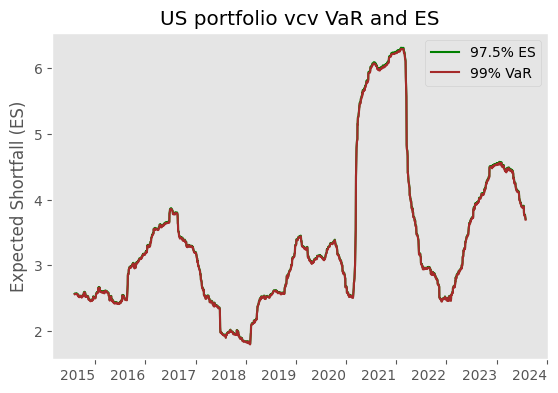

In [546]:
# Assuming you have already defined the dataframes US_VcV_ES and US_VcV_1day_VaR

# Plot the data with labels
US_VcV_ES_plot = US_VcV_ES[252:].plot(color='green', label='97.5% ES')
US_VcV_1day_VaR_plot = US_VcV_1day_VaR[252:].plot(color='brown', label='99% VaR')

# Set labels and title
plt.ylabel('Expected Shortfall (ES)')
plt.title('US portfolio vcv VaR and ES')

plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
# Add legends
plt.legend(loc='best')  # 'best' loc places the legend in the best location
plt.show()

**South African VCV ES**

In [547]:
SA = SA_portfolio_return["Portfolio return"]*100
confidence_level = 97.5
SA_portfolio_HS_ES = HS_daily_expected_shortfall(SA, confidence_level)
#Question
SA_portfolio_return['HS Expected Shortfall'] = [0.0]*252 + SA_portfolio_HS_ES

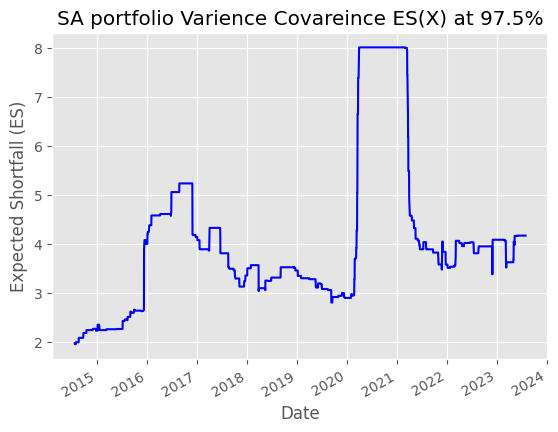

In [548]:
(SA_portfolio_return['HS Expected Shortfall'][252:]).plot(color='blue')
plt.ylabel('Expected Shortfall (ES)')
plt.title('SA portfolio Varience Covareince ES(X) at 97.5%')
plt.show()

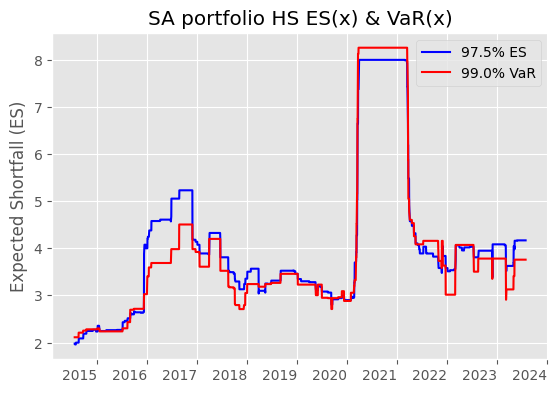

In [549]:
(SA_portfolio_return['HS Expected Shortfall'][252:]).plot(color='blue' , label='97.5% ES')
SA_HS_1dayVaR.plot(color='red', label ='99.0% VaR')
plt.ylabel('Expected Shortfall (ES)')

plt.legend(loc='best')
plt.title('SA portfolio HS ES(x) & VaR(x)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

# Backtesting of both Historical Simulation and Varience covarience $VaR(X)$ at $99\%$  

In [550]:
def bactesting_HS(df, investment):

  back_res = []

  VaR = df['HS Expected Shortfall'][252:]
  profit_loss = df['Portfolio return'][252:]*investment

  exception = []
  for i in range(len(VaR)):
    if profit_loss <=- VaR[i]:
      res = 1
    else:
      rest = 0
    back_res.append(res)
  return back_res




In [551]:
# Backtesting of HS and vcv $VaR(x)$ at $99\%$ confidence level.
US_portfolio_return[252:]

,AMZN,BAC,BK,C,GOOG,Portfolio return,HS Expected Shortfall
Date,,,,,,,
2014-08-04,0.021462,0.004673,0.012136,0.004990,0.012507,0.011153,2.816539
2014-08-05,-0.004240,-0.003322,-0.006378,-0.009309,-0.014098,-0.007469,2.816539
2014-08-06,0.005027,0.013333,0.009756,0.005220,0.002308,0.007129,2.816539
2014-08-07,-0.007773,-0.005263,-0.023137,-0.001661,-0.005322,-0.008631,2.816539
2014-08-08,0.017178,0.005291,0.002082,0.008114,0.009603,0.008454,2.816539
...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.438559
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.438559
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.438559


In [552]:
df = US_portfolio_return[252:]
df

,AMZN,BAC,BK,C,GOOG,Portfolio return,HS Expected Shortfall
Date,,,,,,,
2014-08-04,0.021462,0.004673,0.012136,0.004990,0.012507,0.011153,2.816539
2014-08-05,-0.004240,-0.003322,-0.006378,-0.009309,-0.014098,-0.007469,2.816539
2014-08-06,0.005027,0.013333,0.009756,0.005220,0.002308,0.007129,2.816539
2014-08-07,-0.007773,-0.005263,-0.023137,-0.001661,-0.005322,-0.008631,2.816539
2014-08-08,0.017178,0.005291,0.002082,0.008114,0.009603,0.008454,2.816539
...,...,...,...,...,...,...,...
2023-07-25,0.002562,-0.015314,-0.015601,-0.011960,0.007466,-0.006569,3.438559
2023-07-26,-0.007589,0.008087,0.018304,0.008494,0.055949,0.016649,3.438559
2023-07-27,0.000780,-0.014193,-0.001327,0.008212,0.001620,-0.000982,3.438559
